In [105]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from time import strftime
import keras_tuner as kt


In [2]:
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)

In [3]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [4]:
per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

Perceptron(random_state=42)

In [5]:
X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)

In [6]:
y_pred

array([ True, False])

In [7]:
housing = fetch_california_housing()

In [8]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
  housing.data, housing.target, random_state=42
)

X_train, X_valid, y_train, y_valid = train_test_split(
  X_train_full, y_train_full, random_state=42
)

In [9]:
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)

In [10]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=[50, 50, 50],
                              random_state=42))])

In [11]:
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)

In [12]:
rmse

0.5053326657968629

In [13]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [14]:
X_train.shape

(55000, 28, 28)

In [15]:
X_train.dtype

dtype('uint8')

In [16]:
X_train, X_valid, X_test = X_train/255., X_valid/255., X_test/255.

In [17]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [18]:
class_names[y_train[0]]

'Ankle boot'

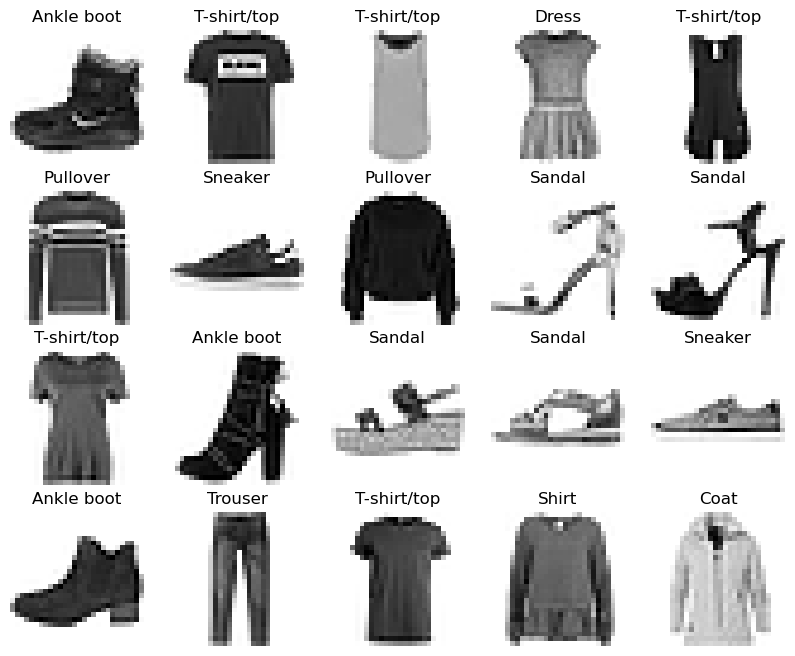

In [19]:
plt.figure(figsize=(10, 8))
for i in range(20):
  plt.subplot(4, 5, i+1)
  plt.imshow(X_train[i], cmap="binary")
  plt.axis("off")
  plt.title(class_names[y_train[i]])

In [20]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

2023-12-20 20:35:25.280390: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-20 20:35:27.429111: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [21]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=[28, 28]),
  tf.keras.layers.Dense(300, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.layers

In [24]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [25]:
model.get_layer("dense_3") is hidden1

True

In [26]:
weights, biases = hidden1.get_weights()

In [27]:
weights

array([[ 0.00255939, -0.05587296, -0.00900012, ..., -0.05923602,
        -0.05873403,  0.03257566],
       [ 0.00739095,  0.00903109,  0.05588667, ...,  0.06748469,
         0.03792059, -0.02330862],
       [ 0.038337  , -0.02543241,  0.03141049, ..., -0.05192104,
         0.06071055, -0.07332107],
       ...,
       [ 0.02987619, -0.03923993, -0.06562141, ...,  0.03441731,
         0.04981171,  0.03141993],
       [-0.05347771,  0.06781721,  0.04812782, ..., -0.02214434,
        -0.04791917,  0.05640416],
       [ 0.01135562,  0.02847857,  0.01231475, ..., -0.06380104,
         0.00238509, -0.01984135]], dtype=float32)

In [28]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [29]:
weights.shape

(784, 300)

In [30]:
biases.shape

(300,)

In [31]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [32]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

In [33]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

2023-12-20 20:35:31.023069: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7182 - accuracy: 0.7629 - val_loss: 0.5020 - val_accuracy: 0.8282
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4859 - accuracy: 0.8313 - val_loss: 0.4538 - val_accuracy: 0.8392
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4368 - accuracy: 0.8470 - val_loss: 0.4208 - val_accuracy: 0.8528
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4108 - accuracy: 0.8561 - val_loss: 0.3905 - val_accuracy: 0.8630
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3897 - accuracy: 0.8621 - val_loss: 0.3859 - val_accuracy: 0.8626
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3729 - accuracy: 0.8678 - val_loss: 0.3869 - val_accuracy: 0.8650
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3603 - accuracy: 0.8716 - val_loss: 0.3678 - val_accuracy:

<Axes: xlabel='Epoch'>

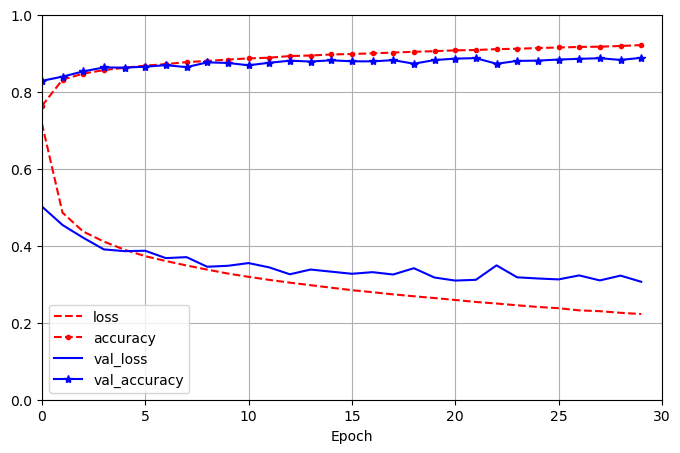

In [34]:
pd.DataFrame(history.history).plot(
  figsize=(8, 5), xlim=[0, 30], ylim=[0, 1], grid=True, xlabel="Epoch",
  style=["r--", "r--.", "b-", "b-*"]
)

In [35]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3199 - accuracy: 0.8860


[0.319905549287796, 0.8859999775886536]

In [36]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 86ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [37]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [38]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [39]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

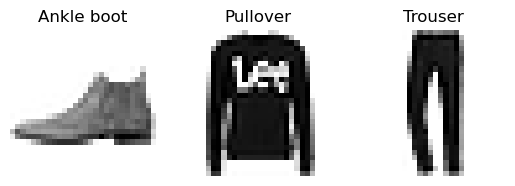

In [40]:
for i in range(3):
  plt.subplot(1, 3, i+1)
  plt.imshow(X_new[i], cmap="binary")
  plt.axis("off")
  plt.title(class_names[y_new[i]])

In [41]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
  housing.data, housing.target, random_state=42
)

X_train, X_valid, y_train, y_valid = train_test_split(
  X_train_full, y_train_full, random_state=42
)

In [42]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])

In [43]:
model = tf.keras.Sequential([
  norm_layer,
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(1)
])

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 8)                 17        
 on)                                                             
                                                                 
 dense_6 (Dense)             (None, 50)                450       
                                                                 
 dense_7 (Dense)             (None, 50)                2550      
                                                                 
 dense_8 (Dense)             (None, 50)                2550      
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5618 (21.95 KB)
Trainable params: 5601 (21.88 KB)
Non-trainable params: 17 (72.00 Byte)
__________________

In [45]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

In [46]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
363/363 [==============================] - 2s 3ms/step - loss: 0.9323 - root_mean_squared_error: 0.9655 - val_loss: 0.4534 - val_root_mean_squared_error: 0.6733
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3739 - root_mean_squared_error: 0.6115 - val_loss: 2.8183 - val_root_mean_squared_error: 1.6788
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3853 - root_mean_squared_error: 0.6207 - val_loss: 0.4342 - val_root_mean_squared_error: 0.6589
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3447 - root_mean_squared_error: 0.5871 - val_loss: 3.4433 - val_root_mean_squared_error: 1.8556
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3391 - root_mean_squared_error: 0.5823 - val_loss: 9.2188 - val_root_mean_squared_error: 3.0362
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3938 - root_mean_squared_error: 0.6275 - val_loss: 1.3311 - val_

<Axes: xlabel='Epoch'>

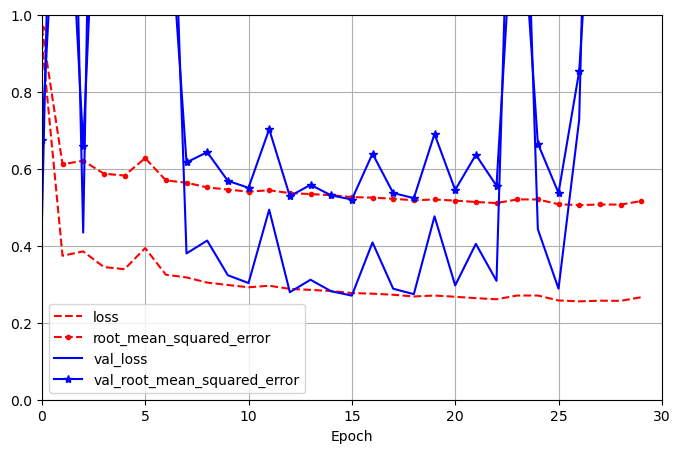

In [47]:
pd.DataFrame(history.history).plot(
  figsize=(8, 5), xlim=[0, 30], ylim=[0, 1], grid=True, xlabel="Epoch",
  style=["r--", "r--.", "b-", "b-*"]
)

In [48]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.2818 - root_mean_squared_error: 0.5309


[0.28183677792549133, 0.5308830142021179]

In [49]:
X_new = X_test[:3]
X_new

array([[ 1.68120000e+00,  2.50000000e+01,  4.19220056e+00,
         1.02228412e+00,  1.39200000e+03,  3.87743733e+00,
         3.60600000e+01, -1.19010000e+02],
       [ 2.53130000e+00,  3.00000000e+01,  5.03938356e+00,
         1.19349315e+00,  1.56500000e+03,  2.67979452e+00,
         3.51400000e+01, -1.19460000e+02],
       [ 3.48010000e+00,  5.20000000e+01,  3.97715472e+00,
         1.18587747e+00,  1.31000000e+03,  1.36033229e+00,
         3.78000000e+01, -1.22440000e+02]])

In [50]:
model.predict(X_new)

1/1 [==============================] - 0s 96ms/step


array([[0.47239733],
       [1.0930794 ],
       [4.724635  ]], dtype=float32)

In [51]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

In [52]:
y_train.max()

5.00001

In [53]:
X_train.shape

(11610, 8)

In [54]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

In [55]:
input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [56]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 normalization_1 (Normaliza  (None, 8)                    17        ['input_2[0][0]']             
 tion)                                                                                            
                                                                                                  
 dense_10 (Dense)            (None, 30)                   270       ['normalization_1[0][0]']     
                                                                                                  
 dense_11 (Dense)            (None, 30)                   930       ['dense_10[0][0]']        

In [57]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(loss="mse", optimizer=optimizer,
             metrics=["RootMeanSquaredError"])
normalization_layer.adapt(X_train)

In [58]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
363/363 [==============================] - 2s 3ms/step - loss: 1.0201 - root_mean_squared_error: 1.0100 - val_loss: 0.8982 - val_root_mean_squared_error: 0.9477
Epoch 2/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4534 - root_mean_squared_error: 0.6733 - val_loss: 1.4516 - val_root_mean_squared_error: 1.2048
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3986 - root_mean_squared_error: 0.6314 - val_loss: 0.7492 - val_root_mean_squared_error: 0.8656
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3691 - root_mean_squared_error: 0.6076 - val_loss: 1.3172 - val_root_mean_squared_error: 1.1477
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3674 - root_mean_squared_error: 0.6061 - val_loss: 3.6665 - val_root_mean_squared_error: 1.9148
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3755 - root_mean_squared_error: 0.6128 - val_loss: 3.1236 - val_

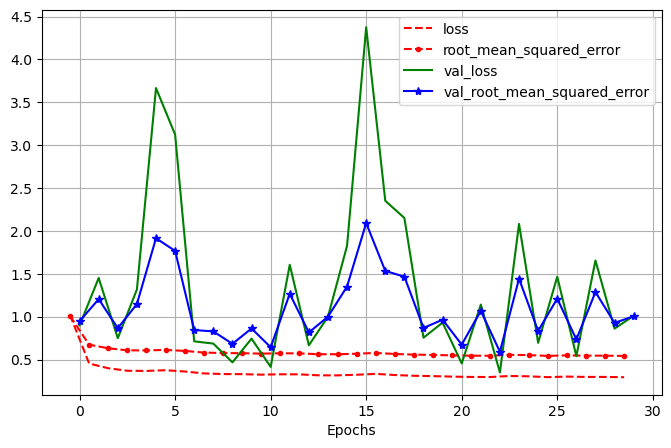

In [59]:
plt.figure(figsize=(8,5))

for key, style in zip(history.history, ["r--", "r--.", "g-", "b-*"]):
  epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5)
  plt.plot(epochs, history.history[key], style, label=key)
plt.xlabel("Epochs")
plt.grid()
plt.legend()

In [60]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.2987 - root_mean_squared_error: 0.5465


[0.29867249727249146, 0.5465093851089478]

In [61]:
input_wide = tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])

norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()

norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)

concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [62]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 normalization_3 (Normaliza  (None, 6)                    13        ['input_4[0][0]']             
 tion)                                                                                            
                                                                                                  
 input_3 (InputLayer)        [(None, 5)]                  0         []                            
                                                                                                  
 dense_13 (Dense)            (None, 30)                   210       ['normalization_3[0][0]'

In [63]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(
  loss="mse",
  optimizer=optimizer,
  metrics=["RootMeanSquaredError"]
)

In [64]:
X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

In [65]:
history = model.fit(
  (X_train_wide, X_train_deep), y_train, epochs=30,
  validation_data=((X_valid_wide, X_valid_deep), y_valid)
)

Epoch 1/30
363/363 [==============================] - 2s 3ms/step - loss: 1.5418 - root_mean_squared_error: 1.2417 - val_loss: 0.6548 - val_root_mean_squared_error: 0.8092
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5489 - root_mean_squared_error: 0.7409 - val_loss: 0.9352 - val_root_mean_squared_error: 0.9670
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4800 - root_mean_squared_error: 0.6928 - val_loss: 0.5059 - val_root_mean_squared_error: 0.7113
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4342 - root_mean_squared_error: 0.6589 - val_loss: 0.5941 - val_root_mean_squared_error: 0.7708
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4029 - root_mean_squared_error: 0.6348 - val_loss: 0.7782 - val_root_mean_squared_error: 0.8822
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3826 - root_mean_squared_error: 0.6185 - val_loss: 0.5114 - val_

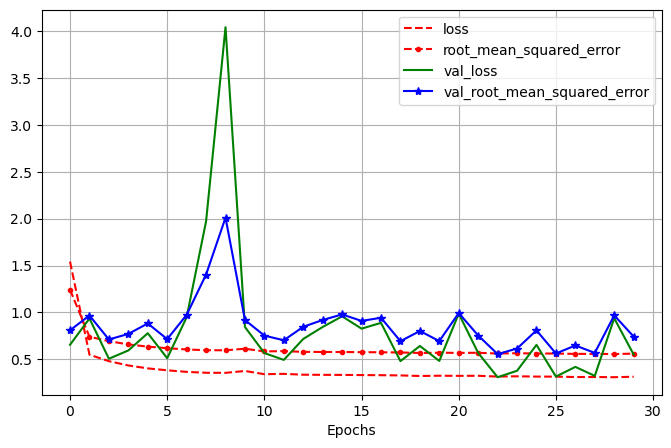

In [66]:
pd.DataFrame(history.history).plot(
  figsize=(8,5), grid=True, xlabel="Epochs",
  style=["r--", "r--.", "g-", "b-*"]
)
plt.legend()


In [67]:
model.evaluate((X_test_wide, X_test_deep), y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3149 - root_mean_squared_error: 0.5611


[0.3148772120475769, 0.5611392259597778]

In [68]:
input_wide = tf.keras.layers.Input(shape=[5])
norm_layer_wide = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)

input_deep = tf.keras.layers.Input(shape=[6])
norm_layer_deep = tf.keras.layers.Normalization()
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)

concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)

aux_output = tf.keras.layers.Dense(1)(hidden2)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output, aux_output])

In [69]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 normalization_5 (Normaliza  (None, 6)                    13        ['input_6[0][0]']             
 tion)                                                                                            
                                                                                                  
 input_5 (InputLayer)        [(None, 5)]                  0         []                            
                                                                                                  
 dense_16 (Dense)            (None, 30)                   210       ['normalization_5[0][0]'

In [70]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1),
             optimizer=optimizer, metrics=["RootMeanSquaredError"])

In [71]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history = model.fit(
  (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
  validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
363/363 [==============================] - 3s 5ms/step - loss: 1.1401 - dense_18_loss: 1.0621 - dense_19_loss: 1.8425 - dense_18_root_mean_squared_error: 1.0306 - dense_19_root_mean_squared_error: 1.3574 - val_loss: 0.8744 - val_dense_18_loss: 0.4806 - val_dense_19_loss: 4.4185 - val_dense_18_root_mean_squared_error: 0.6933 - val_dense_19_root_mean_squared_error: 2.1020
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4694 - dense_18_loss: 0.4422 - dense_19_loss: 0.7145 - dense_18_root_mean_squared_error: 0.6649 - dense_19_root_mean_squared_error: 0.8453 - val_loss: 1.1407 - val_dense_18_loss: 1.0727 - val_dense_19_loss: 1.7525 - val_dense_18_root_mean_squared_error: 1.0357 - val_dense_19_root_mean_squared_error: 1.3238
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4310 - dense_18_loss: 0.4131 - dense_19_loss: 0.5922 - dense_18_root_mean_squared_error: 0.6427 - dense_19_root_mean_squared_error: 0.7695 - val_loss: 0.464

In [72]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))

162/162 [==============================] - 0s 2ms/step - loss: 0.3309 - dense_18_loss: 0.3246 - dense_19_loss: 0.3878 - dense_18_root_mean_squared_error: 0.5697 - dense_19_root_mean_squared_error: 0.6227


In [73]:
eval_results

[0.33087876439094543,
 0.32455456256866455,
 0.38779518008232117,
 0.5696969032287598,
 0.6227320432662964]

In [74]:
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

In [75]:
model.predict((X_new_wide, X_new_deep))

1/1 [==============================] - 0s 101ms/step


[array([[0.35166532],
        [1.3137399 ],
        [3.5397458 ]], dtype=float32),
 array([[0.4729575],
        [1.3792764],
        [3.495034 ]], dtype=float32)]

In [76]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))
y_pred

1/1 [==============================] - 0s 24ms/step


{'dense_18': array([[0.35166532],
        [1.3137399 ],
        [3.5397458 ]], dtype=float32),
 'dense_19': array([[0.4729575],
        [1.3792764],
        [3.495034 ]], dtype=float32)}

In [77]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

In [78]:
class WideAndDeepModel(tf.keras.Model):
  def __init__(self, units=30, activation="relu", **kwargs):
    super().__init__(**kwargs)
    self.norm_layer_wide = tf.keras.layers.Normalization()
    self.norm_layer_deep = tf.keras.layers.Normalization()
    self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
    self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
    self.main_output = tf.keras.layers.Dense(1)
    self.aux_output = tf.keras.layers.Dense(1)

  def call(self, inputs):
    input_wide, input_deep = inputs
    norm_wide = self.norm_layer_wide(input_wide)
    norm_deep = self.norm_layer_deep(input_deep)
    hidden1 = self.hidden1(norm_deep)
    hidden2 = self.hidden2(hidden1)
    concat = tf.keras.layers.concatenate([norm_wide, hidden2])
    output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)

    return output, aux_output

model = WideAndDeepModel(30, activation="relu", name="my_model")

In [96]:
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-3)

model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1),
             optimizer=optimizer, metrics=["RootMeanSquaredError"])

In [80]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history = model.fit(
  (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
  validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
363/363 [==============================] - 3s 5ms/step - loss: 292.6240 - output_1_loss: 46.0891 - output_2_loss: 2511.4373 - output_1_root_mean_squared_error: 6.7889 - output_2_root_mean_squared_error: 50.1142 - val_loss: 4.1705 - val_output_1_loss: 3.9953 - val_output_2_loss: 5.7473 - val_output_1_root_mean_squared_error: 1.9988 - val_output_2_root_mean_squared_error: 2.3974
Epoch 2/20
363/363 [==============================] - 2s 4ms/step - loss: 2.9921 - output_1_loss: 3.0668 - output_2_loss: 2.3198 - output_1_root_mean_squared_error: 1.7512 - output_2_root_mean_squared_error: 1.5231 - val_loss: 2.9906 - val_output_1_loss: 2.7193 - val_output_2_loss: 5.4327 - val_output_1_root_mean_squared_error: 1.6490 - val_output_2_root_mean_squared_error: 2.3308
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 2.2180 - output_1_loss: 2.2183 - output_2_loss: 2.2160 - output_1_root_mean_squared_error: 1.4894 - output_2_root_mean_squared_error: 1.4886 - val_loss

In [81]:
model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))

162/162 [==============================] - 0s 2ms/step - loss: 0.7384 - output_1_loss: 0.6760 - output_2_loss: 1.3000 - output_1_root_mean_squared_error: 0.8222 - output_2_root_mean_squared_error: 1.1402


[0.7383525371551514,
 0.6759523153305054,
 1.2999563217163086,
 0.8221631646156311,
 1.1401562690734863]

In [82]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_6 (Normaliza  multiple                  11        
 tion)                                                           
                                                                 
 normalization_7 (Normaliza  multiple                  13        
 tion)                                                           
                                                                 
 dense_20 (Dense)            multiple                  210       
                                                                 
 dense_21 (Dense)            multiple                  930       
                                                                 
 dense_22 (Dense)            multiple                  36        
                                                                 
 dense_23 (Dense)            multiple                  31 

In [83]:
model.save("../Models/my_keras_model", save_format="tf")

INFO:tensorflow:Assets written to: ../Models/my_keras_model/assets


INFO:tensorflow:Assets written to: ../Models/my_keras_model/assets


In [84]:
model = tf.keras.models.load_model("../Models/my_keras_model")

In [85]:
model.predict((X_new_wide, X_new_deep))

1/1 [==============================] - 0s 173ms/step


(array([[0.8850127],
        [1.3821594],
        [2.1213102]], dtype=float32),
 array([[1.8965907],
        [1.9131083],
        [1.8789058]], dtype=float32))

In [86]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("../Models/my_checkpoints",
                                                  save_weights_only=True)

history = model.fit(
  (X_train_wide, X_train_deep), (y_train, y_train), epochs=30,
  validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
  callbacks=[checkpoint_cb]
)

Epoch 1/30
363/363 [==============================] - 3s 4ms/step - loss: 2.3504 - output_1_loss: 1.7622 - output_2_loss: 7.6441 - output_1_root_mean_squared_error: 1.3275 - output_2_root_mean_squared_error: 2.7648 - val_loss: 1.8476 - val_output_1_loss: 1.3786 - val_output_2_loss: 6.0679 - val_output_1_root_mean_squared_error: 1.1742 - val_output_2_root_mean_squared_error: 2.4633
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.9499 - output_1_loss: 0.8682 - output_2_loss: 1.6856 - output_1_root_mean_squared_error: 0.9317 - output_2_root_mean_squared_error: 1.2983 - val_loss: 3.6955 - val_output_1_loss: 3.5158 - val_output_2_loss: 5.3129 - val_output_1_root_mean_squared_error: 1.8750 - val_output_2_root_mean_squared_error: 2.3050
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 1.5052 - output_1_loss: 1.2754 - output_2_loss: 3.5726 - output_1_root_mean_squared_error: 1.1294 - output_2_root_mean_squared_error: 1.8901 - val_loss: 1.577

In [87]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
  patience=10, restore_best_weights=True
)

In [88]:
history = model.fit(
  (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
  validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
  callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/20
363/363 [==============================] - 1s 4ms/step - loss: 1.3160 - output_1_loss: 1.1906 - output_2_loss: 2.4453 - output_1_root_mean_squared_error: 1.0911 - output_2_root_mean_squared_error: 1.5637 - val_loss: 1.9246 - val_output_1_loss: 1.6192 - val_output_2_loss: 4.6733 - val_output_1_root_mean_squared_error: 1.2725 - val_output_2_root_mean_squared_error: 2.1618
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.7689 - output_1_loss: 0.6824 - output_2_loss: 1.5472 - output_1_root_mean_squared_error: 0.8261 - output_2_root_mean_squared_error: 1.2439 - val_loss: 2.1378 - val_output_1_loss: 1.3693 - val_output_2_loss: 9.0547 - val_output_1_root_mean_squared_error: 1.1702 - val_output_2_root_mean_squared_error: 3.0091
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 1.3742 - output_1_loss: 1.1870 - output_2_loss: 3.0586 - output_1_root_mean_squared_error: 1.0895 - output_2_root_mean_squared_error: 1.7489 - val_loss: 2.187

In [89]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    ratio = logs["val_loss"] / logs["loss"]
    print(f"Epoch={epoch}, val/train={ratio:.2f}")

In [90]:
history = model.fit(
  (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
  validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
  callbacks=[PrintValTrainRatioCallback()]
)

Epoch 1/20
363/363 [==============================] - 2s 5ms/step - loss: 0.7944 - output_1_loss: 0.7319 - output_2_loss: 1.3573 - output_1_root_mean_squared_error: 0.8555 - output_2_root_mean_squared_error: 1.1650 - val_loss: 1.5619 - val_output_1_loss: 1.5940 - val_output_2_loss: 1.2732 - val_output_1_root_mean_squared_error: 1.2625 - val_output_2_root_mean_squared_error: 1.1284
Epoch 2/20
363/363 [==============================] - 2s 4ms/step - loss: 0.8149 - output_1_loss: 0.7285 - output_2_loss: 1.5926 - output_1_root_mean_squared_error: 0.8535 - output_2_root_mean_squared_error: 1.2620 - val_loss: 1.4845 - val_output_1_loss: 1.5036 - val_output_2_loss: 1.3129 - val_output_1_root_mean_squared_error: 1.2262 - val_output_2_root_mean_squared_error: 1.1458
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.9653 - output_1_loss: 0.9122 - output_2_loss: 1.4429 - output_1_root_mean_squared_error: 0.9551 - output_2_root_mean_squared_error: 1.2012 - val_loss: 1.841

In [92]:
def get_run_logdir(root_logdir="my_logs"):
  return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()

In [97]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir,
                                               profile_batch=(100,200))

history = model.fit(
  (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
  validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
  callbacks=[tensorboard_cb]
)

Epoch 1/20


2023-12-20 20:58:49.365978: I tensorflow/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2023-12-20 20:58:49.366035: I tensorflow/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2023-12-20 20:58:49.369965: I tensorflow/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.
2023-12-20 20:58:49.370203: I tensorflow/compiler/xla/backends/profiler/gpu/cupti_tracer.cc:1805] CUPTI activity buffer flushed


150/363 [===========>..................] - ETA: 0s - loss: 1.6701 - output_1_loss: 1.6115 - output_2_loss: 2.1977 - output_1_root_mean_squared_error: 1.2695 - output_2_root_mean_squared_error: 1.4825

2023-12-20 20:58:50.860435: I tensorflow/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2023-12-20 20:58:50.860480: I tensorflow/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.


249/363 [===================>..........] - ETA: 0s - loss: 1.3012 - output_1_loss: 1.2287 - output_2_loss: 1.9539 - output_1_root_mean_squared_error: 1.1084 - output_2_root_mean_squared_error: 1.3978

2023-12-20 20:58:51.243413: I tensorflow/tsl/profiler/lib/profiler_session.cc:70] Profiler session collecting data.
2023-12-20 20:58:51.244302: I tensorflow/compiler/xla/backends/profiler/gpu/cupti_tracer.cc:1805] CUPTI activity buffer flushed
2023-12-20 20:58:51.265952: I tensorflow/compiler/xla/backends/profiler/gpu/cupti_collector.cc:541]  GpuTracer has collected 0 callback api events and 0 activity events. 
2023-12-20 20:58:51.267075: I tensorflow/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.
2023-12-20 20:58:51.267284: I tensorflow/tsl/profiler/rpc/client/save_profile.cc:144] Collecting XSpace to repository: my_logs/run_2023_12_20_20_49_17/plugins/profile/2023_12_20_20_58_51/infinity.xplane.pb


363/363 [==============================] - 3s 5ms/step - loss: 1.1622 - output_1_loss: 1.0556 - output_2_loss: 2.1220 - output_1_root_mean_squared_error: 1.0274 - output_2_root_mean_squared_error: 1.4567 - val_loss: 0.7193 - val_output_1_loss: 0.5465 - val_output_2_loss: 2.2744 - val_output_1_root_mean_squared_error: 0.7393 - val_output_2_root_mean_squared_error: 1.5081
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 1.0137 - output_1_loss: 0.9145 - output_2_loss: 1.9067 - output_1_root_mean_squared_error: 0.9563 - output_2_root_mean_squared_error: 1.3808 - val_loss: 1.9662 - val_output_1_loss: 2.0041 - val_output_2_loss: 1.6246 - val_output_1_root_mean_squared_error: 1.4157 - val_output_2_root_mean_squared_error: 1.2746
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 1.0501 - output_1_loss: 1.0042 - output_2_loss: 1.4628 - output_1_root_mean_squared_error: 1.0021 - output_2_root_mean_squared_error: 1.2094 - val_loss: 1.0152 - val_out

In [98]:
print("my_logs")
for path in sorted(Path("my_logs").glob("**/*")):
    print("  " * (len(path.parts) - 1) + path.parts[-1])

my_logs
  run_2023_12_20_20_49_17
    plugins
      profile
        2023_12_20_20_51_50
          infinity.xplane.pb
        2023_12_20_20_58_51
          infinity.xplane.pb
    train
      events.out.tfevents.1703101909.infinity.16858.0.v2
      events.out.tfevents.1703102329.infinity.16858.2.v2
    validation
      events.out.tfevents.1703101910.infinity.16858.1.v2
      events.out.tfevents.1703102331.infinity.16858.3.v2


In [99]:
%load_ext tensorboard

In [100]:
%tensorboard --logdir=./my_logs

In [ ]:
def build_model(hp):
  n_hidden = hb